<a href="https://colab.research.google.com/github/TeoGal/python-finance-readgroup/blob/main/chapter_5/chapter_5_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/TeoGal/python-finance-readgroup/blob/main/chapter_5/chapter_5_updated.ipynb)


Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

Install Talib in Google Colab from
https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4488    0  4488    0     0  12754      0 --:--:-- --:--:-- --:--:-- 12786
100  517k  100  517k    0     0   628k      0 --:--:-- --:--:-- --:--:-- 3795k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4500    0  4500    0     0  16210      0 --:--:-- --:--:-- --:--:-- 16245
100  392k  100  392k    0     0   615k      0 --:--:-- --:--:-- --:--:--  615k


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

'''
Can't resolve the following commented code in Google colab for some reason
'''

#from pandas.core.common import SettingWithCopyWarning
#warnings.simplefilter(action="ignore", category=FutureWarning)
#warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

# Chapter 5 - Technical Analysis and Building Interactive Dashboards

## 5.1 Calculating the most popular technical indicators

### How to do it...

1. Import the libraries:

In [ ]:
import pandas as pd
import yfinance as yf
import talib

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


2. Download IBM's stock prices from 2020:

In [ ]:
df = yf.download("IBM",
                 start="2020-01-01",
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,105.977059,106.699278,105.796511,106.306770,3293436
2020-01-03,104.854494,105.867169,104.846644,105.458961,2482890
2020-01-06,104.736731,105.380441,104.564026,105.270546,2537073
2020-01-07,104.948692,105.945662,104.721040,105.341194,3232977
2020-01-08,105.592403,106.652176,105.129241,106.220413,4545916
...,...,...,...,...,...
2020-12-23,102.347735,103.446564,102.232070,102.364258,2817819
2020-12-24,103.273058,103.355678,102.620374,103.016937,1842111
2020-12-28,103.355682,104.594954,102.826924,103.124352,3781499


3. Calculate and plot the Simple Moving Average:

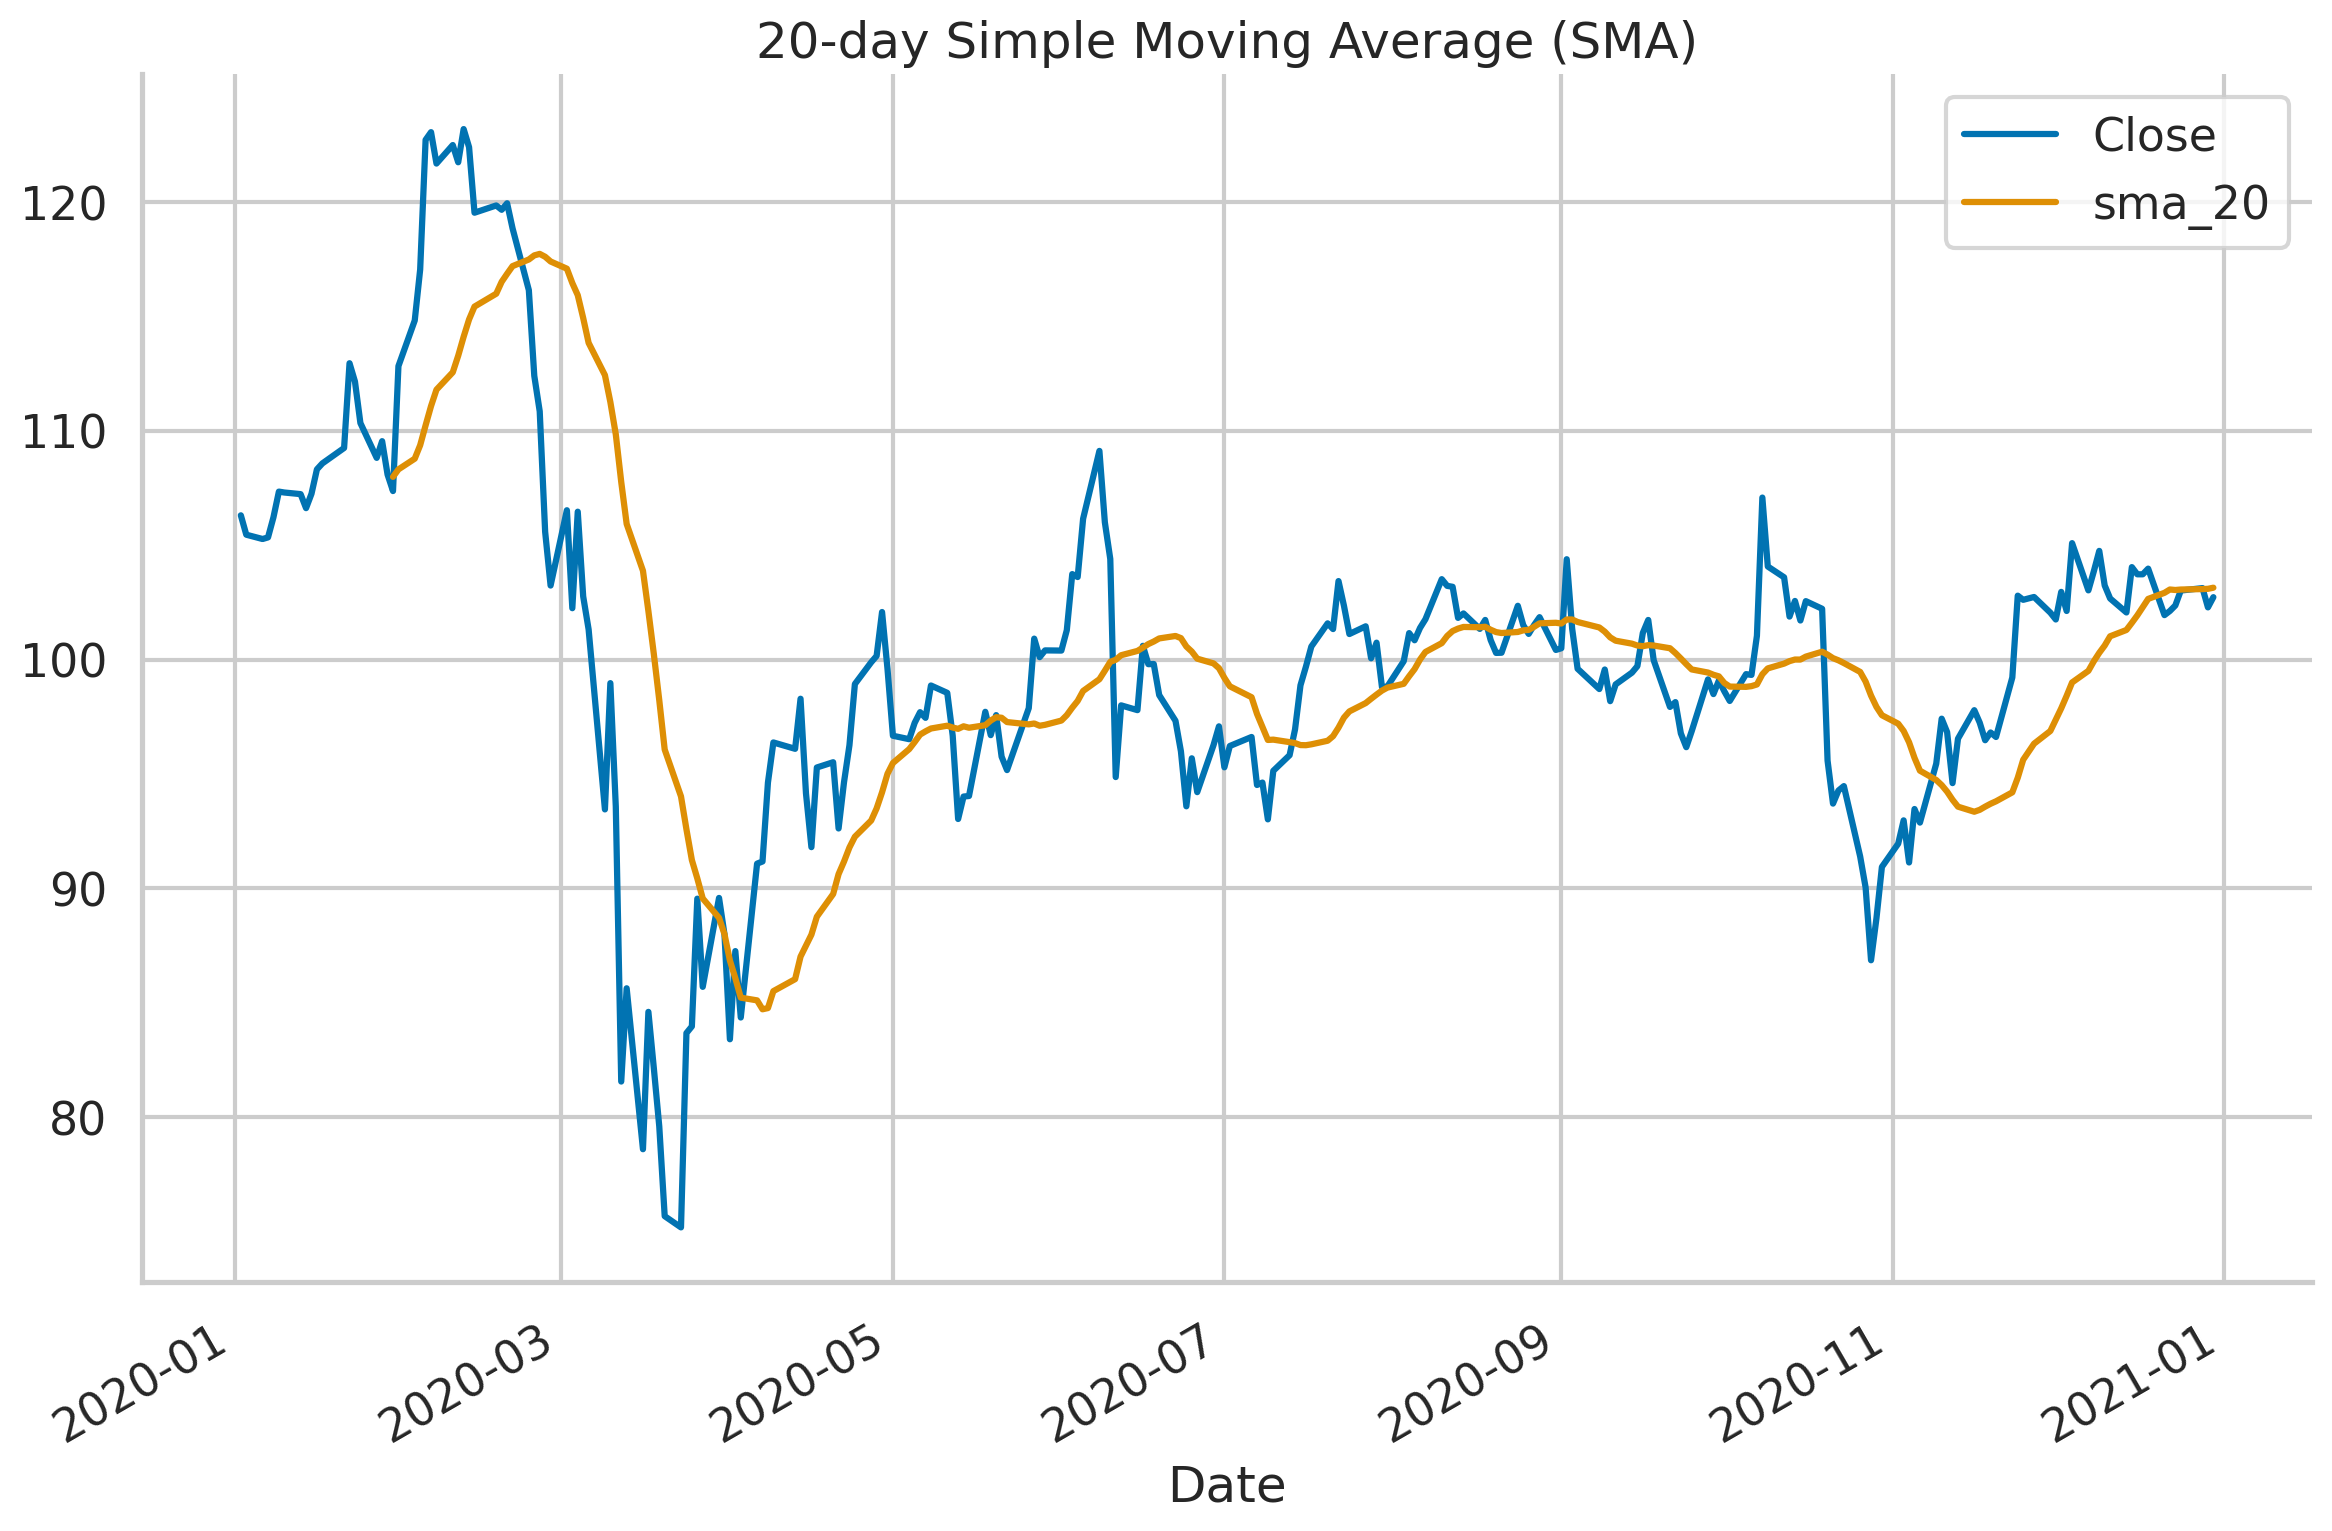

In [ ]:
df["sma_20"] = talib.SMA(df["Close"], timeperiod=20)
(
    df[["Close", "sma_20"]]
    .plot(title="20-day Simple Moving Average (SMA)")
)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_1", dpi=200)

4. Calculate and plot the Bollinger bands:

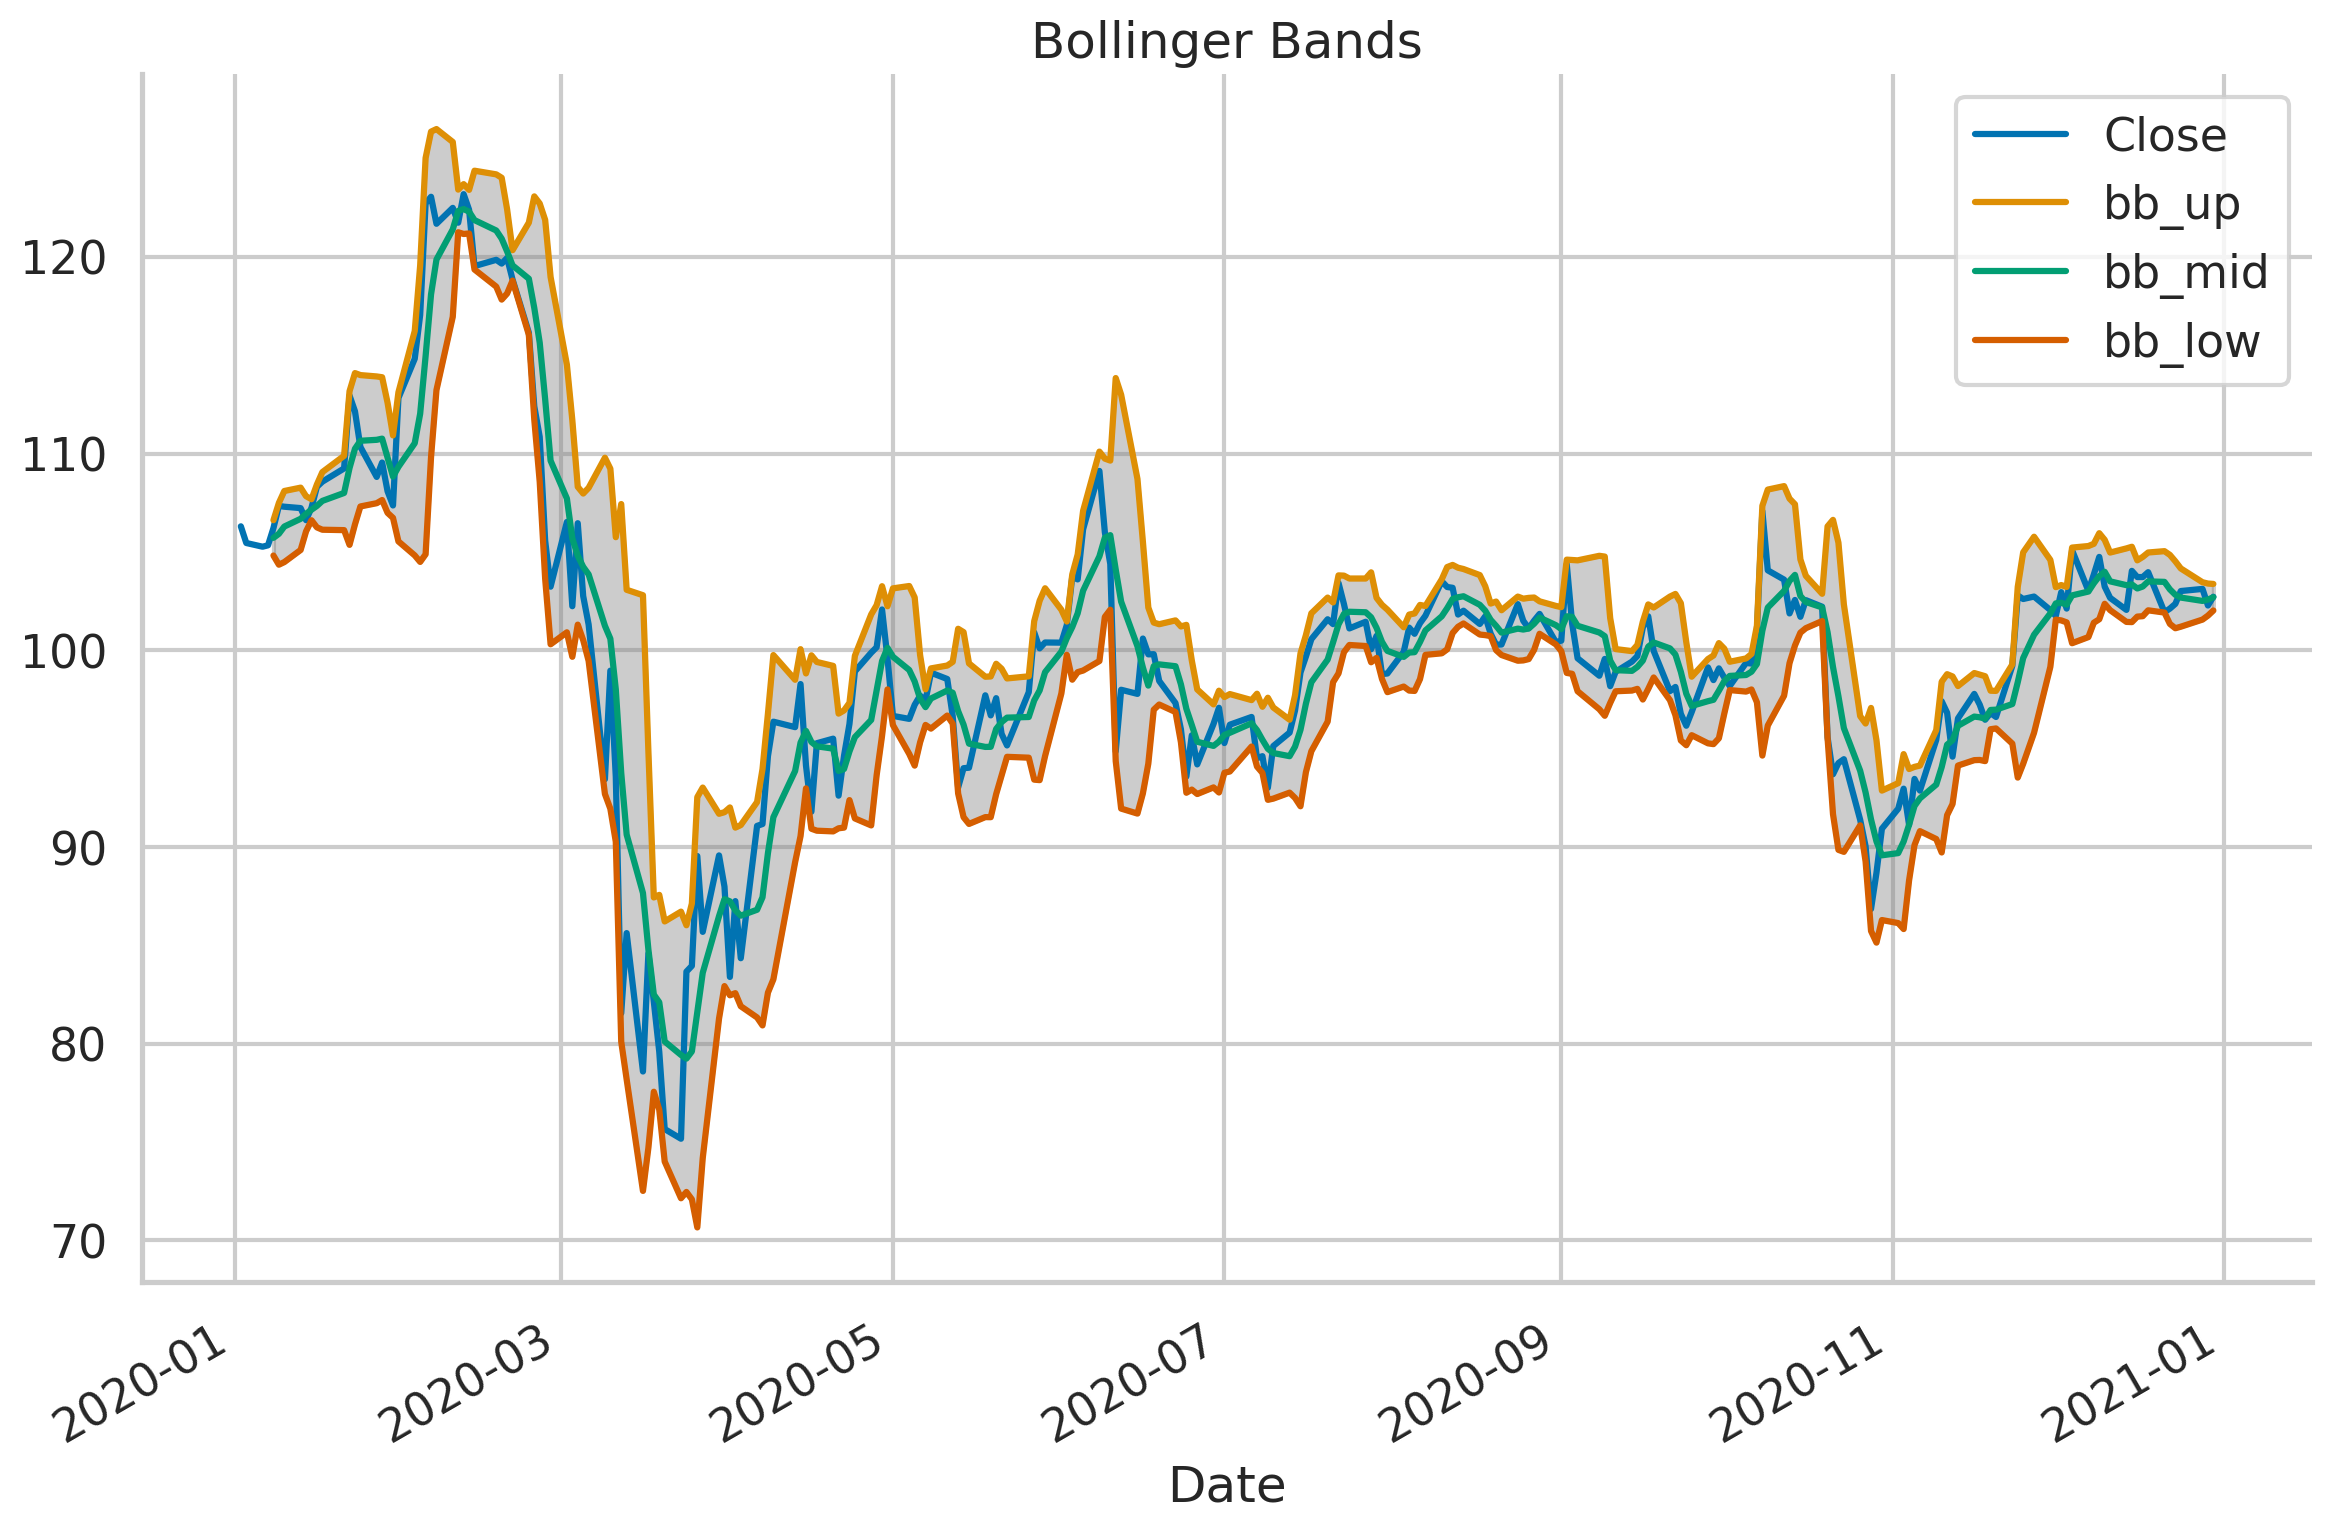

In [ ]:
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()

(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax=ax, title="Bollinger Bands")
)

ax.fill_between(df.index, df["bb_low"], df["bb_up"],
                color="gray",
                alpha=.4)

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_2", dpi=200)

5. Calculate and plot the RSI:

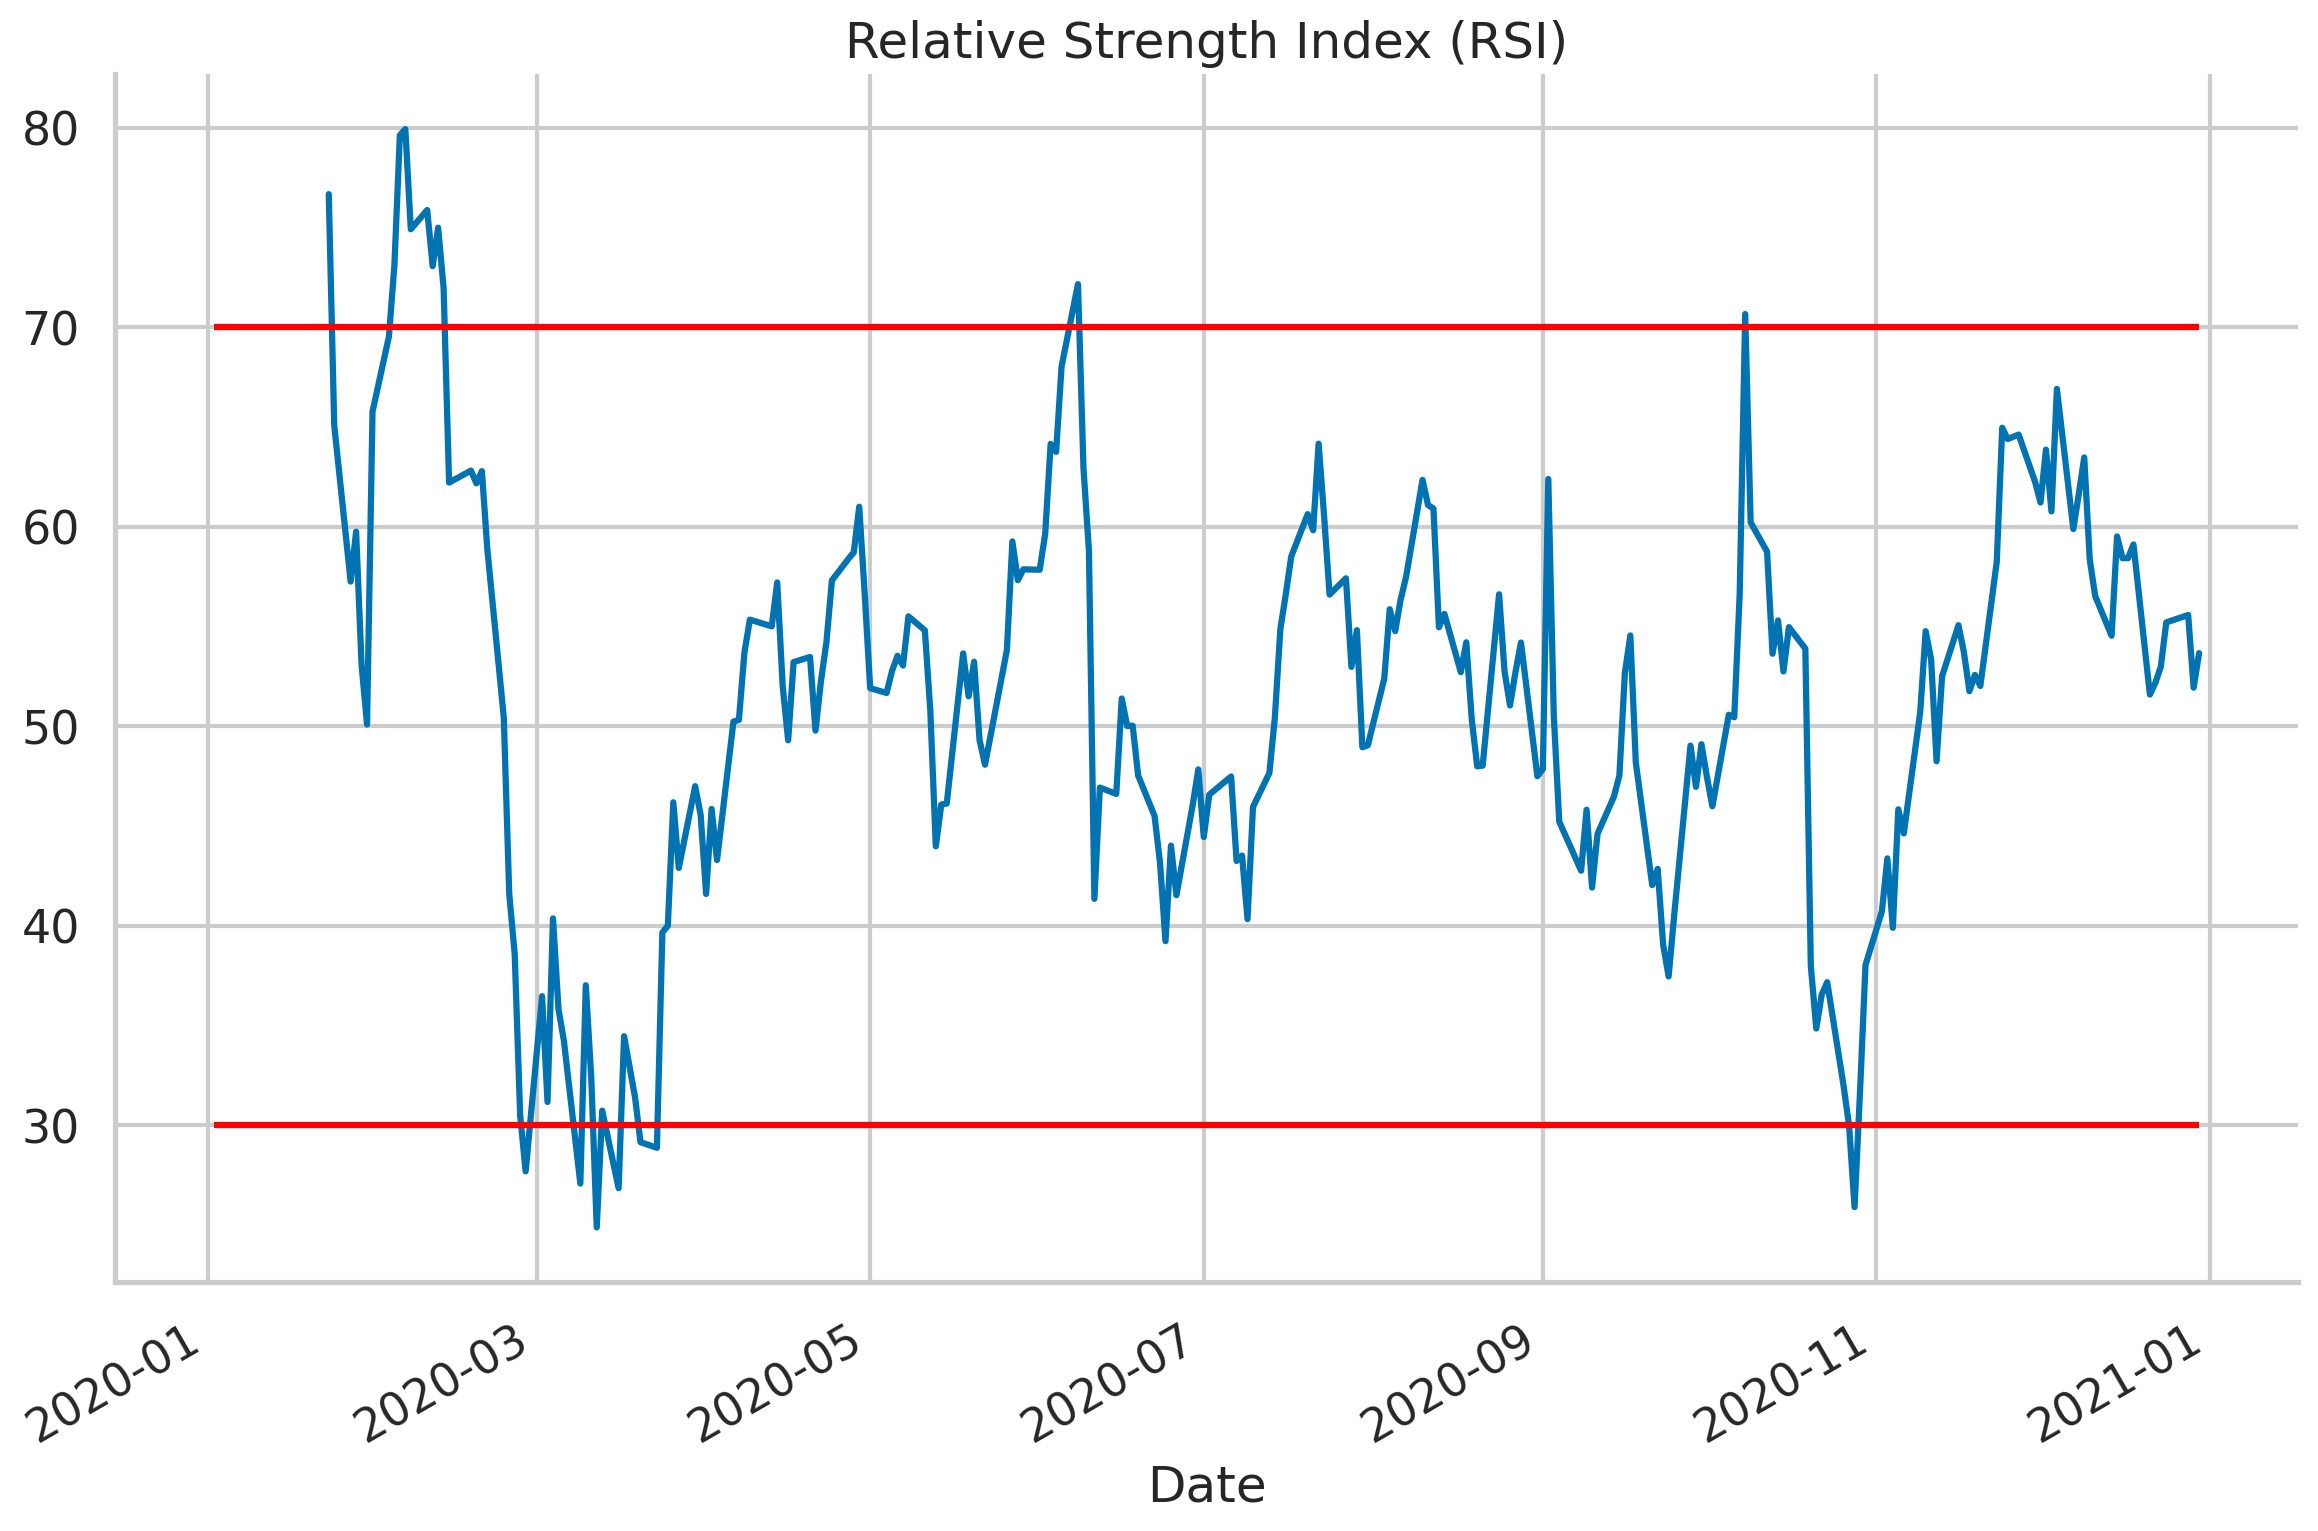

In [ ]:
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax=ax,
               title="Relative Strength Index (RSI)")
ax.hlines(y=30,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color="red")
ax.hlines(y=70,
          xmin=df.index.min(),
          xmax=df.index.max(),
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_3", dpi=200)

6. Calculate and plot the MACD:

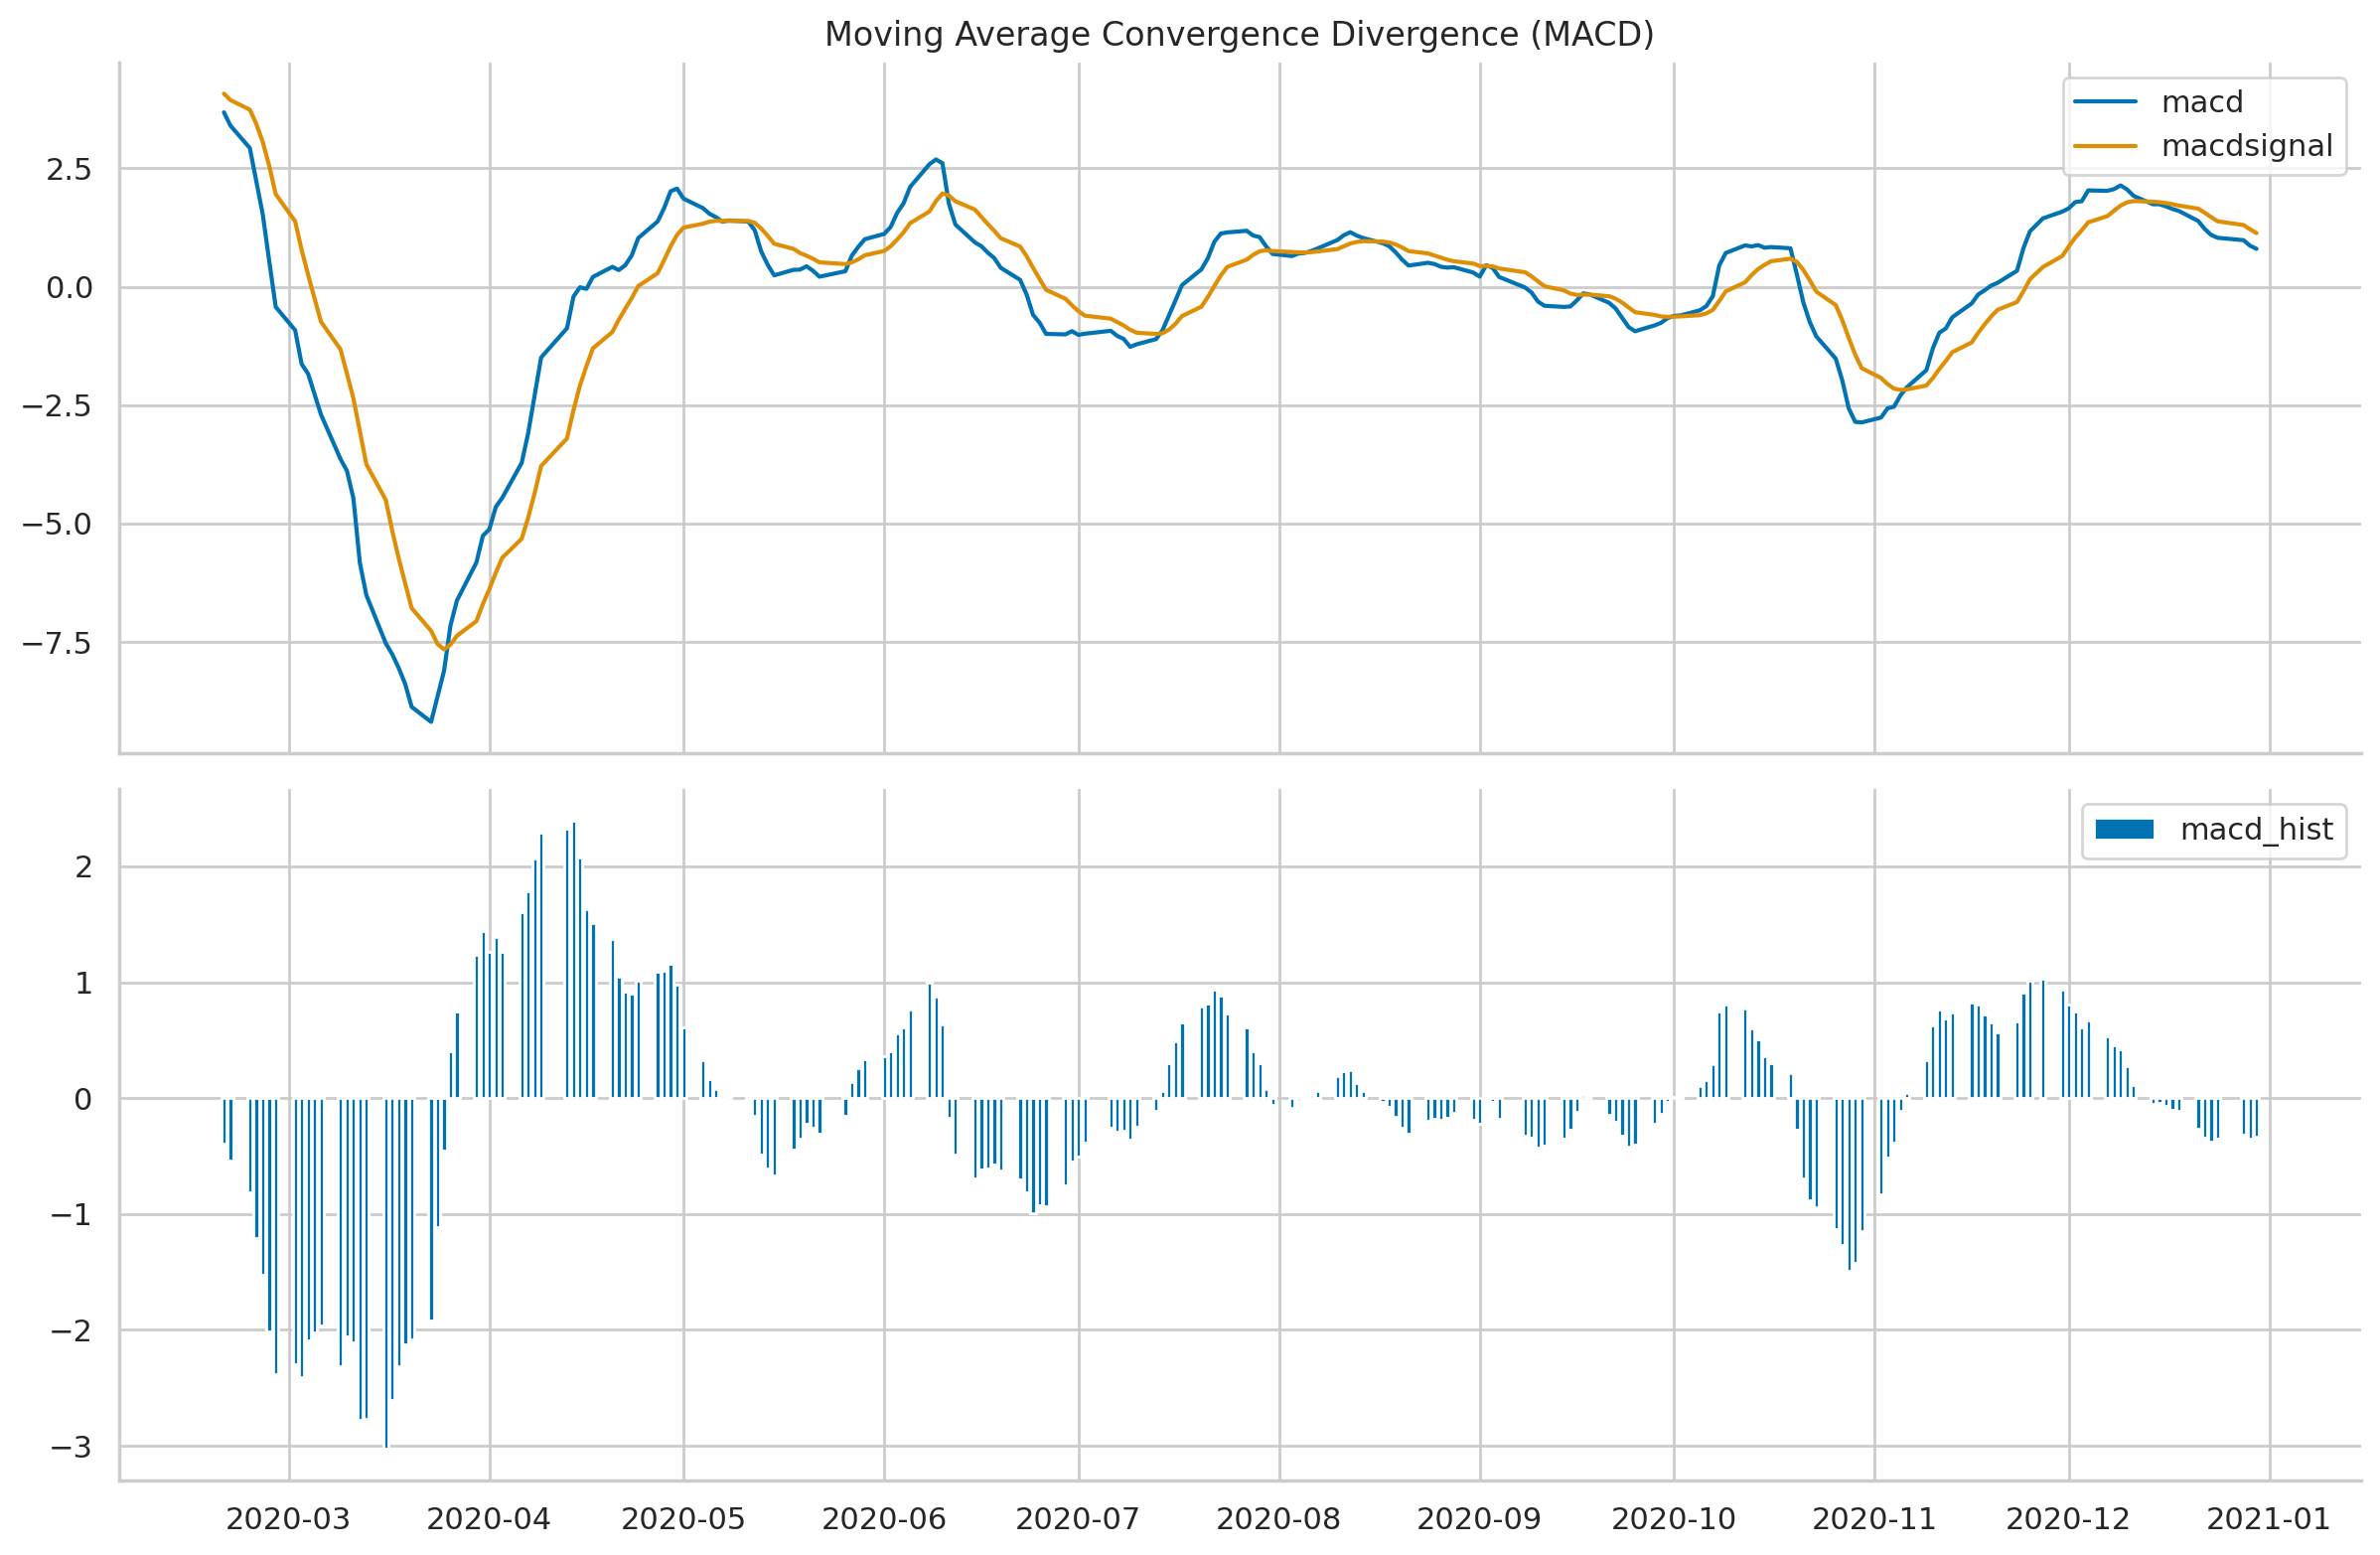

In [ ]:
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod=12, slowperiod=26, signalperiod=9
)

with sns.plotting_context("notebook"):
    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        df[["macd", "macdsignal"]].
        plot(ax=ax[0],
             title="Moving Average Convergence Divergence (MACD)")
    )
    ax[1].bar(df.index, df["macdhist"].values, label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_4", dpi=200)


### There's more

1. Import the libraries:

In [ ]:
!pip install ta #First Install the package
from ta import add_all_ta_features

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29413 sha256=e2a0b49e858c4316d0e172bbbe4a62c63f55fd22d10ebbfb85a762bcbe211567
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


2. Discard the previously calculated indicators and keep only the required columns:

In [ ]:
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()

3. Calculate all the technical indicators available in the `ta` library:

In [ ]:
df = add_all_ta_features(df, open="Open", high="High",
                         low="Low", close="Close",
                         volume="Volume")

In [ ]:
df.shape

(252, 91)

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'volume_adi', 'volume_obv',
       'volume_cmf', 'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt',
       'volume_vwap', 'volume_mfi', 'volume_nvi', 'volatility_bbm',
       'volatility_bbh', 'volatility_bbl', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi', 'volatility_bbli', 'volatility_kcc',
       'volatility_kch', 'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw', 'volatility_dcp',
       'volatility_atr', 'volatility_ui', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast',
       'trend_ema_slow', 'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',
       'trend_ichimoku_base

## 5.2 Downloading the technical indicators

### How to do it...

1. Import the libraries:

In [ ]:
!pip install alpha_vantage
from alpha_vantage.techindicators import TechIndicators

2. Instantiate the `TechIndicators` class and authenticate:

In [ ]:
ta_api = TechIndicators(key="SXS8LU6AY6E8IU5M",
                        output_format="pandas")

3. Download the RSI for IBM's stock:

In [ ]:
rsi_df, rsi_meta = ta_api.get_rsi(symbol="IBM",
                                  time_period=14)

4. Plot the downloaded RSI:

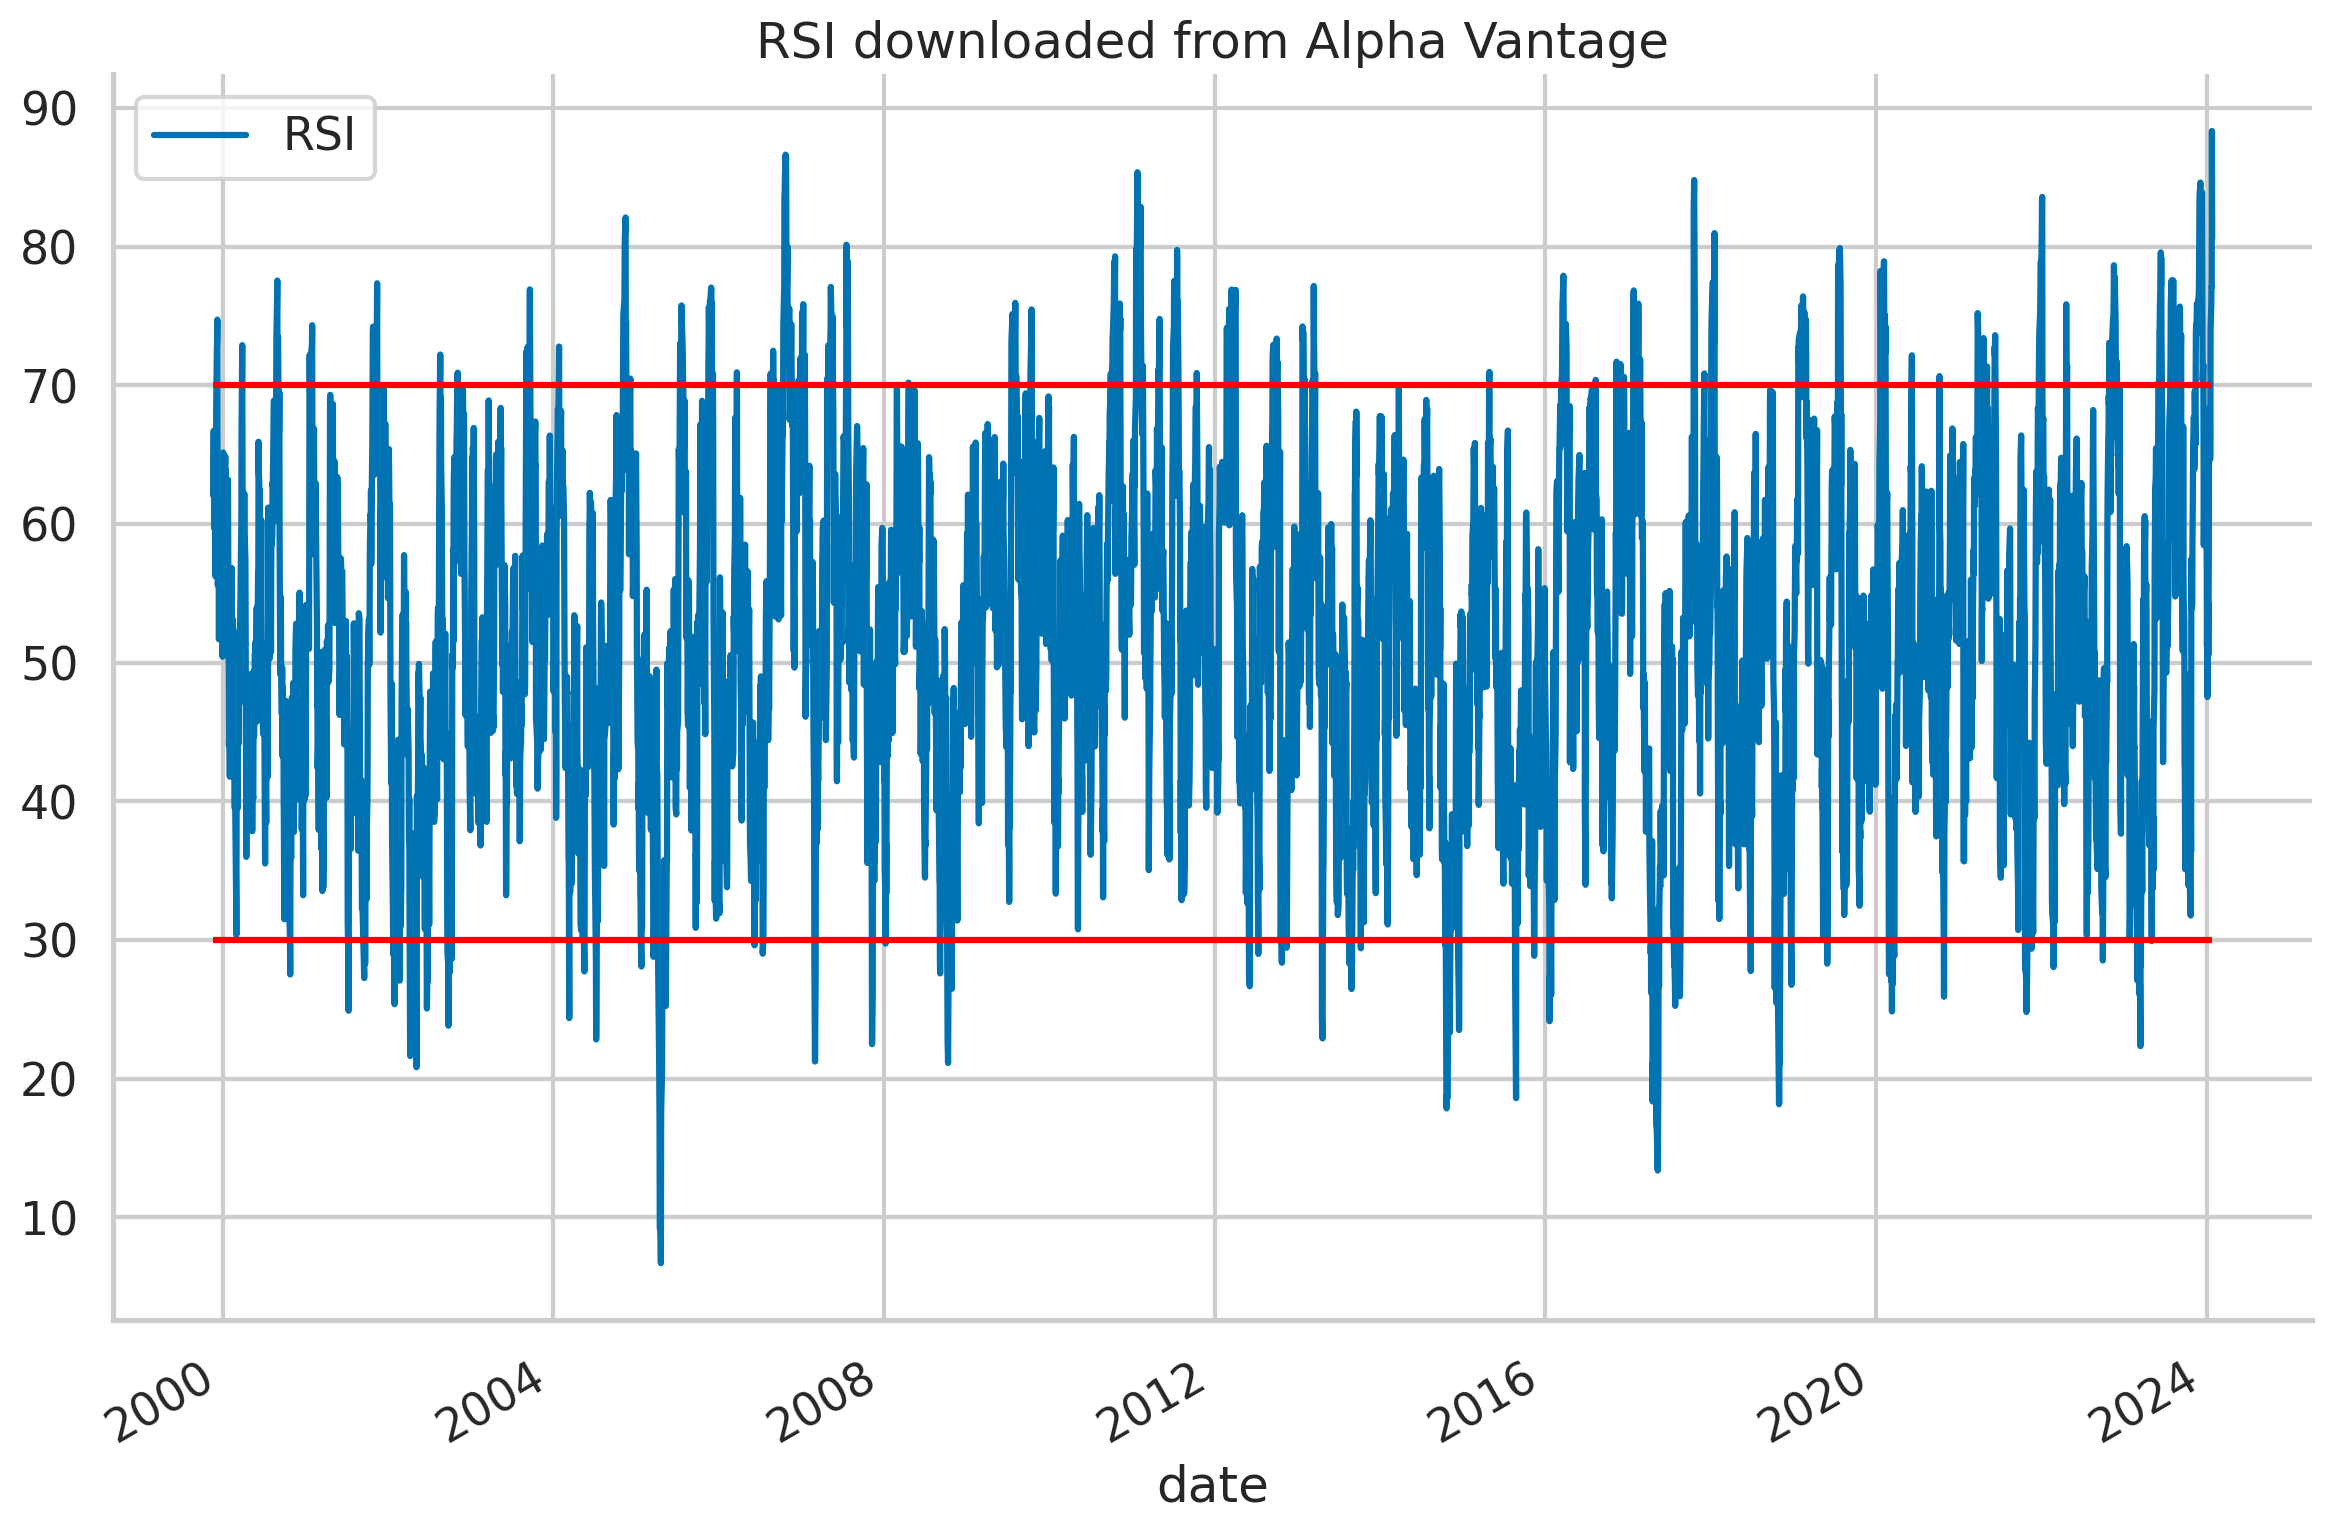

In [ ]:
fig, ax = plt.subplots()
rsi_df.plot(ax=ax,
            title="RSI downloaded from Alpha Vantage")
ax.hlines(y=30,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color="red")
ax.hlines(y=70,
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(),
          color="red")

sns.despine()
plt.tight_layout()
# plt.savefig("images/figure_5_5", dpi=200)

In [ ]:
rsi_df

,RSI
date,
1999-11-19,62.0696
1999-11-22,66.7188
1999-11-23,62.8952
1999-11-24,59.7185
1999-11-26,60.4087
...,...
2024-01-22,75.7386
2024-01-23,77.0993
2024-01-24,77.0574


5. Explore the metadata object:

In [ ]:
rsi_meta

{'1: Symbol': 'IBM',
 '2: Indicator': 'Relative Strength Index (RSI)',
 '3: Last Refreshed': '2024-01-26',
 '4: Interval': 'daily',
 '5: Time Period': 14,
 '6: Series Type': 'close',
 '7: Time Zone': 'US/Eastern Time'}

### There's more (I think you need to pay now for this, and doesn't add anything)

1. Import the libraries:

In [ ]:
!pip install intrinio_sdk
import intrinio_sdk as intrinio
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.4 MB/s eta 0:00:00


2. Authenticate using the personal API key and select the API:

In [ ]:
intrinio.ApiClient().set_api_key("OjI1ODIyNmNjMDQzYTI5MzdiYjIwMWRkZjAyYjRlOGU4")
security_api = intrinio.SecurityApi()

3. Request the MACD for IBM's stock from 2020:

In [ ]:
'''
Seems that now you need an active subscription for this one
'''

r = security_api.get_security_price_technicals_macd(
    identifier="IBM",
    fast_period=12,
    slow_period=26,
    signal_period=9,
    price_key="close",
    start_date="2020-01-01",
    end_date="2020-12-31",
    page_size=500
)

ApiException: (401)
Reason: Unauthorized
HTTP response headers: HTTPHeaderDict({'Date': 'Mon, 29 Jan 2024 15:27:08 GMT', 'Content-Type': 'application/json', 'Content-Length': '104', 'Connection': 'keep-alive', 'Vary': 'Origin,Accept-Encoding'})
HTTP response body: {"human":"No active subscription(s).","message":"An active subscription is required to view this data."}


4. Convert the request's output into a `pandas` DataFrame:

In [ ]:
macd_df = (
    pd.DataFrame(r.technicals_dict)
    .sort_values("date_time")
    .set_index("date_time")
)
macd_df.index = pd.to_datetime(macd_df.index).date
macd_df

,macd_histogram,macd_line,signal_line
2020-01-02,0.101039,-0.027359,-0.128399
2020-01-03,0.069252,-0.041833,-0.111086
2020-01-06,0.031395,-0.071842,-0.103237
2020-01-07,0.012705,-0.087355,-0.100061
2020-01-08,0.072713,-0.009169,-0.081882
...,...,...,...
2020-12-24,-0.374587,1.123076,1.497662
2020-12-28,-0.340861,1.071586,1.412447
2020-12-29,-0.379825,0.937666,1.317491
2020-12-30,-0.361885,0.865134,1.227020


5. Plot the MACD:

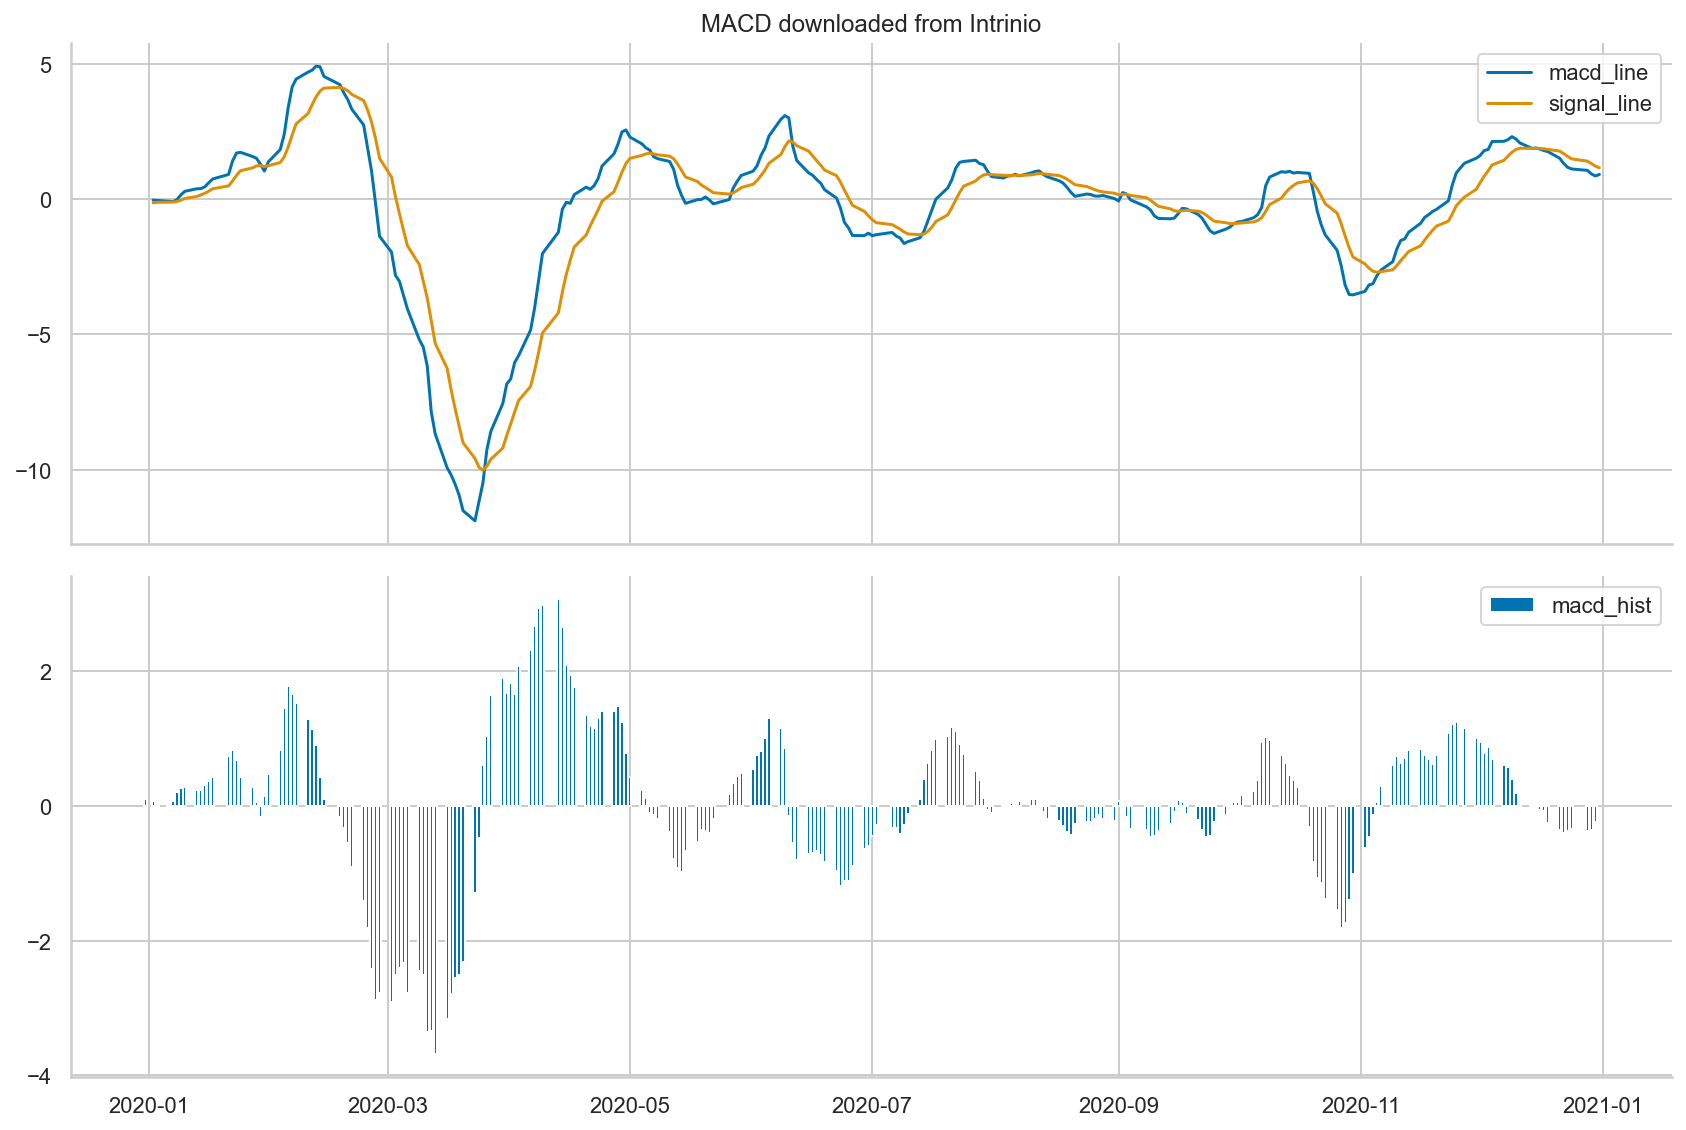

In [ ]:
with sns.plotting_context("notebook"):

    fig, ax = plt.subplots(2, 1, sharex=True)

    (
        macd_df[["macd_line", "signal_line"]]
        .plot(ax=ax[0],
              title="MACD downloaded from Intrinio")
    )
    ax[1].bar(df.index, macd_df["macd_histogram"].values,
              label="macd_hist")
    ax[1].legend()

    sns.despine()
    plt.tight_layout()
    # plt.savefig("images/figure_5_6", dpi=200)

## 5.3 Recognizing candlestick patterns

### How to do it...

1. Import the libraries:

In [ ]:
!pip install mplfinance

import pandas as pd
import yfinance as yf
import talib
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.2 MB/s eta 0:00:00


2. Download Bitcoin's hourly prices from the last 3 months:

In [ ]:
df = yf.download("BTC-USD",
                 period="9mo",
                 interval="1h",
                 progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-04-29 15:00:00+00:00,29355.289062,29356.466797,29272.148438,29293.464844,29293.464844,0
2023-04-29 16:00:00+00:00,29293.812500,29320.220703,29274.386719,29301.751953,29301.751953,0
2023-04-29 17:00:00+00:00,29302.347656,29306.083984,29088.042969,29178.953125,29178.953125,0
2023-04-29 18:00:00+00:00,29179.269531,29229.269531,29163.625000,29195.015625,29195.015625,0
2023-04-29 19:00:00+00:00,29192.548828,29320.589844,29189.873047,29263.814453,29263.814453,0
...,...,...,...,...,...,...
2024-01-29 11:00:00+00:00,42310.328125,42342.535156,42206.421875,42223.183594,42223.183594,0
2024-01-29 12:00:00+00:00,42231.261719,42361.437500,42003.445312,42098.234375,42098.234375,0
2024-01-29 13:00:00+00:00,42106.925781,42124.218750,41945.539062,41996.125000,41996.125000,241610752


3. Identify the "Three Line Strike" pattern:

In [ ]:
df["3_line_strike"] = talib.CDL3LINESTRIKE(
    df["Open"], df["High"], df["Low"], df["Close"]
)

4. Locate and plot the bearish pattern:

In [ ]:
df[df["3_line_strike"] == -100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-05-18 07:00:00+00:00,27218.53,27443.23,27205.69,27393.38,27393.38,0,-100
2023-05-22 13:00:00+00:00,26743.36,27045.73,26714.18,27016.17,27016.17,670828544,-100
2023-05-23 01:00:00+00:00,26821.62,27083.51,26816.18,27005.75,27005.75,571061248,-100
2023-06-04 06:00:00+00:00,27042.96,27142.12,27041.88,27133.54,27133.54,105805824,-100
2023-06-09 12:00:00+00:00,26617.03,26697.81,26617.03,26672.18,26672.18,0,-100


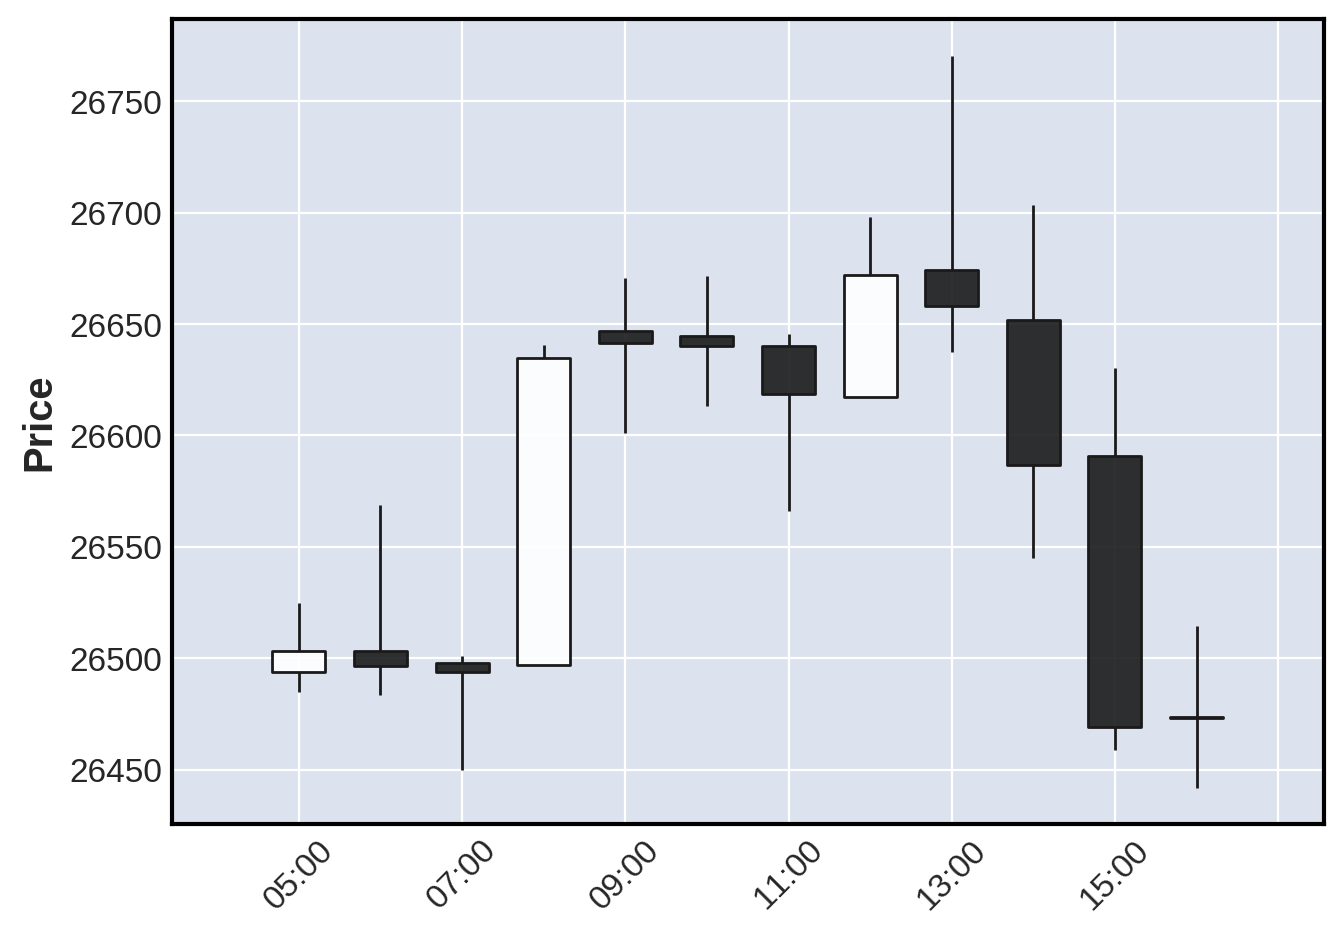

In [ ]:
mpf.plot(df["2023-06-09 05:00:00":"2023-06-09 16:00:00"],
         type="candle")

5. Locate and plot the bullish pattern:

In [ ]:
df[df["3_line_strike"] == 100].head().round(2)

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2023-06-12 12:00:00+00:00,25991.80,25991.80,25912.51,25930.69,25930.69,41630720,100
2023-07-08 18:00:00+00:00,30264.95,30264.95,30202.94,30205.38,30205.38,0,100
2023-07-16 23:00:00+00:00,30338.71,30338.71,30171.79,30250.34,30250.34,264502784,100
2023-08-10 11:00:00+00:00,29519.91,29523.74,29462.47,29470.03,29470.03,0,100
2023-08-30 06:00:00+00:00,27464.55,27464.55,27379.30,27386.76,27386.76,99358720,100


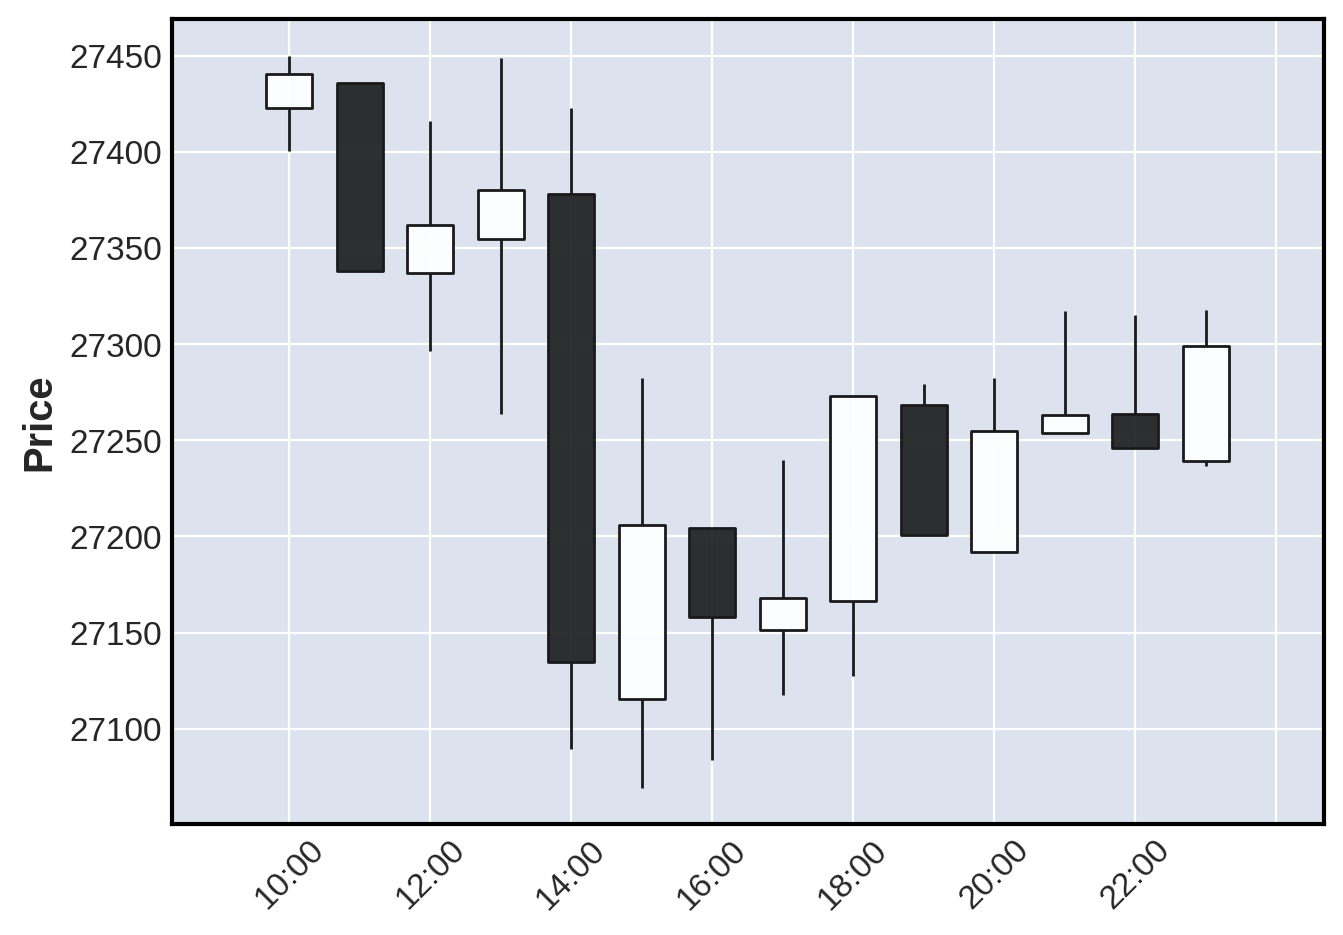

In [ ]:
mpf.plot(df["2023-08-30 10:00:00":"2023-08-30 23:00:00"],
         type="candle")

### There's more

1. Get all available pattern names:

In [ ]:
candle_names = talib.get_function_groups()["Pattern Recognition"]

2. Iterate over the list of patterns and try identifying them all:

In [ ]:
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df["Open"], df["High"],
                                        df["Low"], df["Close"])

3. Inspect the summary statistics of the patterns:

In [ ]:
with pd.option_context("display.max_rows", len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,6600.0,-0.03,1.74,-100.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,6600.0,-0.05,2.13,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,6600.0,-0.09,11.28,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,6600.0,-0.03,6.51,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,6600.0,-0.26,23.90,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,6600.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,6600.0,0.23,4.76,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,6600.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,6600.0,-0.97,9.80,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,6600.0,0.38,43.08,-100.0,0.0,0.0,0.0,100.0


4. Locate and plot the "Evening Star" pattern:

In [ ]:
df[df["CDLEVENINGSTAR"]  == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-05-10 21:00:00+00:00,27875.826172,27875.826172,27440.468750,27521.869141,27521.869141,652687360,0,0,0,0,...,0,0,0,0,0,0,0,0,0,100
2023-06-01 00:00:00+00:00,27218.412109,27346.105469,27048.951172,27062.232422,27062.232422,577002496,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-03 04:00:00+00:00,30759.115234,30789.113281,30683.988281,30683.988281,30683.988281,152043520,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-07-08 18:00:00+00:00,30264.947266,30264.947266,30202.941406,30205.380859,30205.380859,0,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-08-02 12:00:00+00:00,29547.423828,29581.294922,29461.578125,29461.578125,29461.578125,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


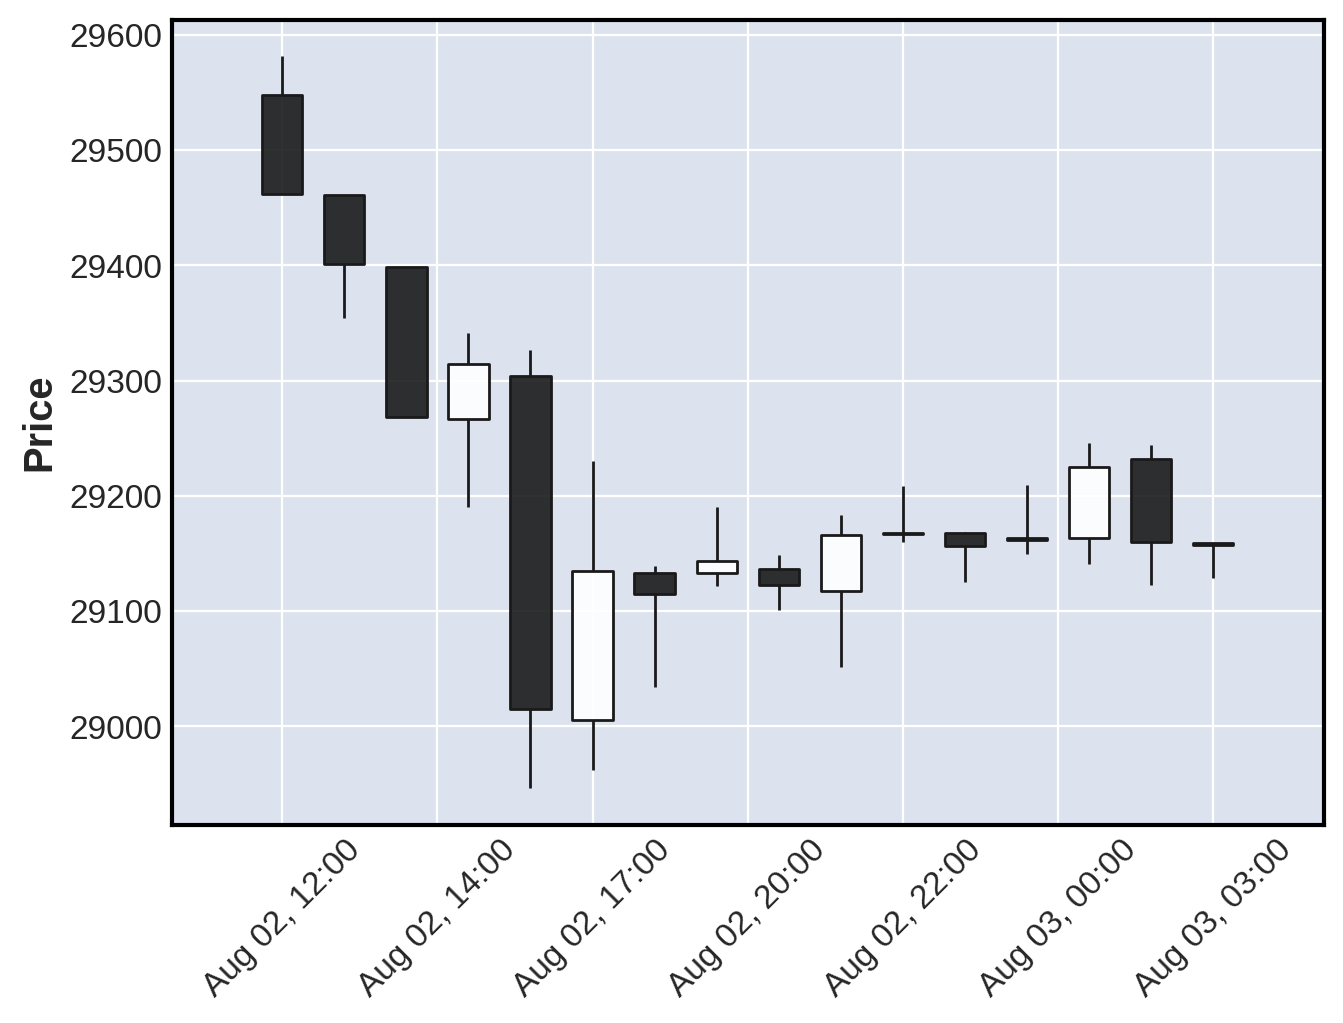

In [ ]:
mpf.plot(df["2023-08-02 12:00:00":"2023-08-03 03:00:00"], type="candle")